In [2]:
import pandas as pd
import numpy as np
auctions_dtypes = {'auction_type_id': np.float16, 'country': 'category', 'platform': 'category',
                   'ref_type_id': 'category', 'source_id': 'category', 'device_id': 'category'}
auctions = pd.read_csv('auctions.csv', dtype = auctions_dtypes)

In [3]:
auctions.drop('auction_type_id', axis = 1, inplace = True)

In [4]:
auctions["date"] =  pd.to_datetime(auctions["date"], errors = "coerce")

In [5]:
auctions.head()

,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [7]:
auctions.dtypes

country              category
date           datetime64[ns]
device_id            category
platform             category
ref_type_id          category
source_id            category
dtype: object

In [8]:
clicks_dtypes = {'advertiser': np.int8, 'action_id': np.float16, 'source_id': np.int8, 'country_code': 'category',
                 'latitude': np.float16, 'longitude': np.float16, 'carrier_id': np.float16, 'brand': np.float16,
                 'touchX': np.float16, 'touchY': np.float16}
clicks = pd.read_csv('clicks.csv', dtype = clicks_dtypes)

In [11]:
clicks.describe()

,advertiser_id,action_id,source_id,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351.000000,0.0,26351.000000,26351.000000,26351.000000,2.634000e+04,2.633900e+04,3.243000e+03,2.633900e+04,2.635100e+04,6235.000000,22977.000000,23011.000000,23011.000000,2.635100e+04,2.635100e+04
mean,2.991993,NaN,1.245266,1.207031,1.070312,inf,4.635375e+18,4.171028e+18,3.913451e+18,1.299055e+18,1.481445,230.403309,0.639160,1.478516,1.888100e+18,4.611581e+18
std,0.164070,NaN,2.188948,0.004375,0.001891,7.015625e+00,1.642969e+18,2.460496e+18,1.885866e+18,1.149672e+18,1.583008,976.849149,0.302002,2.623047,1.721252e+17,2.673175e+18
min,0.000000,NaN,0.000000,1.205078,1.058594,0.000000e+00,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,3.000000,NaN,0.000000,1.206055,1.070312,3.000000e+00,3.378640e+18,1.975183e+18,1.774085e+18,3.921844e+17,0.000000,2.915000,0.426025,0.182983,1.891515e+18,2.273798e+18
50%,3.000000,NaN,0.000000,1.206055,1.070312,6.000000e+00,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,1.000000,10.588000,0.726074,0.645020,1.891515e+18,4.623721e+18
75%,3.000000,NaN,1.000000,1.206055,1.070312,1.300000e+01,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,2.000000,71.703000,0.900879,0.991211,1.891515e+18,6.917850e+18
max,8.000000,NaN,10.000000,1.238281,1.084961,1.160000e+02,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,13.000000,17616.188000,1.000000,16.593750,6.323872e+18,9.221118e+18


In [16]:
installs_dtypes = {'application_id': 'category', 'ref_type': 'category', 'device_countrycode': 'category',
                   'device_brand': 'category', 'device_model' : 'category', 'session_user_agent': 'category',
                   'user_agent': 'category', 'kind': 'category', 'device_language': 'category'}
installs = pd.read_csv('installs.csv', dtype = installs_dtypes)
installs.head(5)

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876611839898798e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.3013777759776993e+18


In [21]:
clicks["created"] =  pd.to_datetime(clicks["created"])

In [30]:
clicks["hora"] = clicks["created"].dt.hour
clicks["click_count"] = 1

In [32]:
clicks.groupby(by="hora").agg({"click_count":"count"})

,click_count
hora,
0,440
1,4209
2,2327
3,754
4,1079
5,945
6,678
7,518
8,537


In [38]:
auctions["hora"] = auctions["date"].dt.hour
auctions["auction_count"] = 1

In [40]:
auc_x_hora = auctions.groupby(by="hora").agg({"auction_count":"count"})
clicks_x_hora = clicks.groupby(by="hora").agg({"click_count":"count"})

In [44]:
gruop_by_hora = auc_x_hora.join(clicks_x_hora)

In [51]:
gruop_by_hora["porcentaje"] =  gruop_by_hora["click_count"] * 100 / gruop_by_hora["auction_count"]

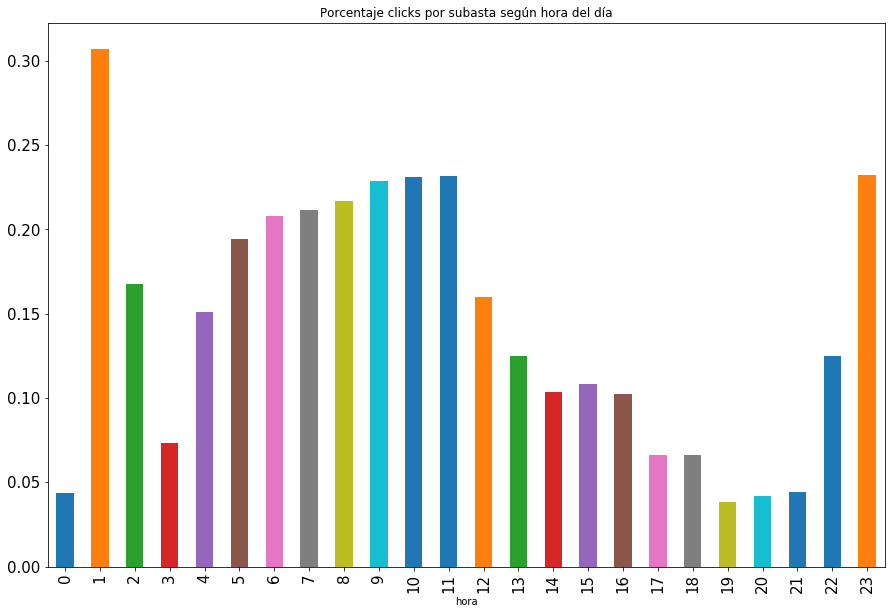

In [73]:
ax = gruop_by_hora["porcentaje"].plot(kind="bar",figsize=(15,10),fontsize=15 , title="Porcentaje clicks por subasta según hora del día")
ax

In [62]:
gruop_by_hora

,auction_count,click_count,porcentaje
hora,,,
0,1005716,440,0.043750
1,1371091,4209,0.306982
2,1388464,2327,0.167595
3,1027541,754,0.073379
4,716194,1079,0.150658
5,487243,945,0.193948
6,325730,678,0.208148
7,245109,518,0.211335
8,247915,537,0.216606


In [74]:
installs.attributed.value_counts()

False    3412
Name: attributed, dtype: int64